In [1]:
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
import preprocess as p

In [10]:
df = p.get_augmented_dataset(verbose=True)

Found the dataset in CheXpert-v1.0-small
Adding patient ID
Adding study number
Adding view number
Adding age group
Adding train/validation


In [17]:
p.fix_dataset(df)

In [18]:
df.head(3)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient ID,Study Number,View Number,Age Group,Train/Validation
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1,0,0,0,0,...,0,0,0,0,1,1,1,1,(65-79) Aged,Train
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0,0,-1,1,0,...,0,-1,0,1,0,2,2,1,(80+) Aged 80,Train
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0,0,0,1,0,...,0,0,0,1,0,2,1,1,(80+) Aged 80,Train


<AxesSubplot:xlabel='Sex', ylabel='Age'>

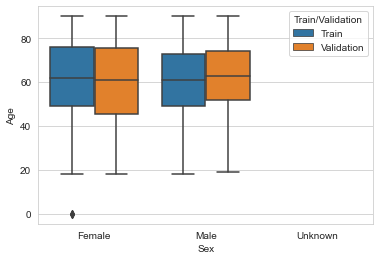

In [19]:
sns.boxplot(data=df, x='Sex', y='Age', hue=p.COL_TRAIN_VALIDATION)

<AxesSubplot:xlabel='Age Group', ylabel='count'>

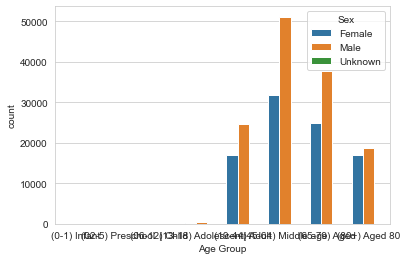

In [20]:
sns.countplot(data=df, x=p.COL_AGE_GROUP, hue='Sex')

In [18]:
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient ID,Study Number,View Number,Age Group,Train/Validation
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,1,1,(65-79) Aged,Train
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,-1.0,1.0,0.0,...,0.0,-1.0,0.0,1.0,0.0,2,2,1,(80+) Aged 80,Train
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2,1,1,(80+) Aged 80,Train
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2,1,2,(80+) Aged 80,Train
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,1,1,(19-44) Adult,Train


In [21]:
df.drop('Path', axis='columns', inplace=True)  # make it smaller to increase performance

In [22]:
def get_aggregated_dataset(labels):
    agg_by = [p.COL_TRAIN_VALIDATION,'Sex', p.COL_AGE_GROUP]
    cols = agg_by + labels
    _df = df[df.columns.intersection(cols)]
    for l in labels:
        _df = _df[_df[l] == 1]
    tmp = _df.groupby(agg_by).count()
    #tmp = tmp.reset_index()
    return tmp

In [23]:
df_agg = get_aggregated_dataset(['Cardiomegaly', 'Edema'])
#df_agg = get_aggregated_dataset(['Cardiomegaly'])

In [24]:
print(df_agg)

                                             Cardiomegaly   Edema
Train/Validation Sex     Age Group                               
Train            Female  (0-1) Infant                 NaN     NaN
                         (02-5) Preschool             NaN     NaN
                         (06-12) Child                NaN     NaN
                         (13-18) Adolescent           8.0     8.0
                         (19-44) Adult              550.0   550.0
                         (45-64) Middle age        1342.0  1342.0
                         (65-79) Aged              1379.0  1379.0
                         (80+) Aged 80             1371.0  1371.0
                 Male    (0-1) Infant                 NaN     NaN
                         (02-5) Preschool             NaN     NaN
                         (06-12) Child                NaN     NaN
                         (13-18) Adolescent           9.0     9.0
                         (19-44) Adult              885.0   885.0
          

In [25]:
print(df_agg.unstack(level='Sex').unstack(p.COL_TRAIN_VALIDATION))

                   Cardiomegaly                                        \
Sex                      Female               Male            Unknown   
Train/Validation          Train Validation   Train Validation   Train   
Age Group                                                               
(0-1) Infant                NaN        NaN     NaN        NaN     NaN   
(02-5) Preschool            NaN        NaN     NaN        NaN     NaN   
(06-12) Child               NaN        NaN     NaN        NaN     NaN   
(13-18) Adolescent          8.0        NaN     9.0        NaN     NaN   
(19-44) Adult             550.0        2.0   885.0        2.0     NaN   
(45-64) Middle age       1342.0        3.0  2526.0        3.0     NaN   
(65-79) Aged             1379.0        2.0  2096.0        5.0     NaN   
(80+) Aged 80            1371.0        3.0  1493.0        2.0     NaN   

                                Edema                                        \
Sex                            Female       

In [26]:
import pandas as pd

In [27]:
labels = ['Cardiomegaly', 'Edema']
filtered_df = df
for l in labels:
    filtered_df = filtered_df[filtered_df[l] == 1]
filtered_df['count'] = 1

In [28]:
filtered_df.head()

,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,...,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient ID,Study Number,View Number,Age Group,Train/Validation,count
31,Female,19,Frontal,AP,0,0,1,0,0,1,...,1,0,0,1,11,12,1,(19-44) Adult,Train,1
132,Male,42,Frontal,AP,0,0,1,1,0,1,...,0,0,0,1,43,2,1,(19-44) Adult,Train,1
133,Male,42,Frontal,AP,0,0,1,1,0,1,...,0,0,0,1,43,3,1,(19-44) Adult,Train,1
134,Female,49,Frontal,PA,0,0,1,1,0,1,...,0,0,0,0,44,7,1,(45-64) Middle age,Train,1
135,Female,49,Lateral,0,0,0,1,1,0,1,...,0,0,0,0,44,7,2,(45-64) Middle age,Train,1


In [47]:
pvt = pd.pivot_table(filtered_df, values='count', index=[p.COL_AGE_GROUP], columns=[p.COL_TRAIN_VALIDATION, 'Sex'], aggfunc=sum, fill_value=0)

In [48]:
pvt

Train/Validation    Train       Validation     
Sex                Female  Male     Female Male
Age Group                                      
(13-18) Adolescent      8     9          0    0
(19-44) Adult         550   885          2    2
(45-64) Middle age   1342  2526          3    3
(65-79) Aged         1379  2096          2    5
(80+) Aged 80        1371  1493          3    2